In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pk

pathGit = "d:/Git_proyects/Tesis/Embbedings_Lkvec/"
path = "d:/Facultad/Tesis/"
Lkvec = pd.read_csv(path+'Lkvec_all_in.csv')

In [2]:
Lkvec_unique = Lkvec.drop_duplicates(subset=['phrase'])


In [3]:
np.shape(Lkvec_unique)

(310457, 6)

In [4]:
#path = "c:/Git-Proyects/Tesis/"

mpnet = pk.load(open(pathGit+'clusters_threshold_75_22.pk', 'rb'))
mini = pk.load(open(pathGit+'clusters_threshold_75_02.pk', 'rb'))
phr = pk.load(open(path+'phr_embbedings/phrases_to_emb.pickle', 'rb'))
Lkvec_unique['id_cluster'] = np.nan

C:\Users\Ale\AppData\Local\Temp\ipykernel_17884\3868424304.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lkvec_unique['id_cluster'] = np.nan


In [5]:
indice_frases = {i: j for j, i in enumerate(Lkvec_unique['phrase'])}
for i, clus in enumerate(c_nuevo):
    Lkvec_unique.loc[Lkvec_unique['phrase'].isin([Lkvec_unique['phrase'][indice_frases[j]] for j in clus]), 'id_cluster'] = str(i+1)

#for i, clus in enumerate(c_nuevo):
#    for j in clus:
#        Lkvec_unique.loc[Lkvec_unique['phrase'] == phr[j], 'id_cluster'] = str(i+1)

NameError: name 'c_nuevo' is not defined

In [6]:
cluster_mapping_mnet = {phr[j]: str(i+1) for i, clus in enumerate(mpnet) for j in clus}
cluster_mapping_mini = {phr[j]: str(i+1) for i, clus in enumerate(mini) for j in clus}


Lkvec_unique['id_cluster_mnet'] = Lkvec_unique['phrase'].map(cluster_mapping_mnet)
Lkvec_unique['id_cluster_mini'] = Lkvec_unique['phrase'].map(cluster_mapping_mini)

Lkvec_unique
np.shape(Lkvec_unique)

C:\Users\Ale\AppData\Local\Temp\ipykernel_17884\3740833514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lkvec_unique['id_cluster_mnet'] = Lkvec_unique['phrase'].map(cluster_mapping_mnet)
C:\Users\Ale\AppData\Local\Temp\ipykernel_17884\3740833514.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lkvec_unique['id_cluster_mini'] = Lkvec_unique['phrase'].map(cluster_mapping_mini)


(310457, 9)

In [7]:
import itertools

def calculate_rand_index(partitionA, partitionB):
    n = len(partitionA)
    a = 0  # Pares concordantes en la misma partición en ambas agrupaciones
    b = 0  # Pares concordantes en particiones diferentes en ambas agrupaciones

    for i in range(n-1):
        for j in range(i+1, n):
            if (partitionA[i] == partitionA[j]) and (partitionB[i] == partitionB[j]):
                a += 1
            elif (partitionA[i] != partitionA[j]) and (partitionB[i] != partitionB[j]):
                b += 1

    combinations = list(itertools.combinations(range(n), 2))
    num_combinations = len(combinations)

    rand_index = (a + b) / num_combinations
    return rand_index

In [8]:
from sklearn.metrics import adjusted_rand_score

Lkvec_ids = np.array(Lkvec_unique['id'])
Clusters_ids = np.array(Lkvec_unique['id_cluster'])


rand_index = adjusted_rand_score(Lkvec_ids, Clusters_ids)

#calculate_rand_index(Lkvec_ids, Clusters_ids)

ValueError: Input contains NaN.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.3136345889906039
0.3136345889906039
0.3136345889906039
0.3136345889906039
0.4043156514800319
0.4043156514800319
0.4043156514800319
0.43985475570165466
0.43985475570165466
0.43985475570165466
0.4553603274524332
0.4553603274524332
0.46421974291243023
0.4833070287219009
0.4833070287219009
0.4817912547279326
0.4843395840049617
0.498166090605371
0.4950382208111924
0.4912765493715124
0.4901819626121846
0.4906000260394838
0.5228844173966872
0.5194309980288082
0.5584206499812219
0.5627490513478675
0.5770173454010359
0.5824055247780485
0.6032613126030755
0.6106395473454441
0.6174291013811125
0.6278135355054018
0.6383013088615526
0.6496800320777407
0.6530434506856065
0.6541887324793275
0.6589861885687905
0.6609008285003604
0.6697513895124896
0.6762332109929259
0.6858982118542207
0.6871355546172118
0.6940787089828727
0.700225982807962
0.7065305283393112
0.7108905083051815
0.7167088929110016
0.7224513717554113
0.7259635561282868
0.7309580745202187
0.73712074731923

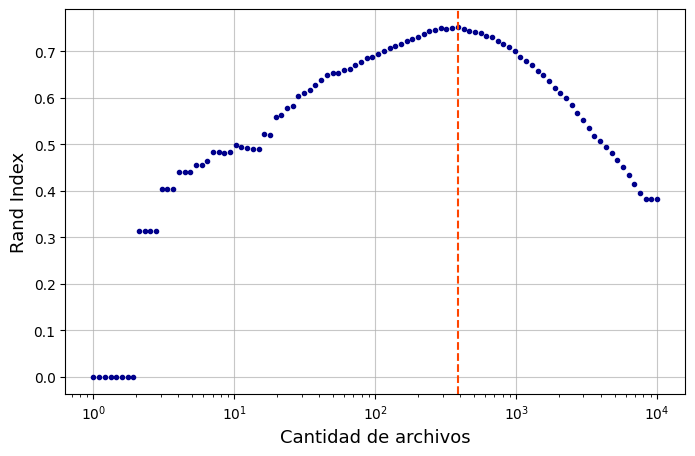

In [12]:
Lkvec_unique
from sklearn.metrics import adjusted_rand_score

#clus_08_02 =  pk.load(open(pathGit+'clusters_threshold_08_02.pk', 'rb'))
clus_08_02 =  pk.load(open(pathGit+'clusters_threshold_08_test.pk', 'rb'))

cluster_mapping_08_02 = {phr[j]: str(i+1) for i, clus in enumerate(clus_08_02) for j in clus}
Lkvec_unique['id_cluster_08_02'] = Lkvec_unique['phrase'].map(cluster_mapping_08_02)
Lkvec_unique = Lkvec_unique.dropna(subset=['id_cluster_08_02'])
header = np.logspace(np.log(1), int(np.log10(len(Lkvec_unique))), 100)
plt.figure(figsize=(8,5))
for value in header:
    cluster_sizes = Lkvec_unique['id'].value_counts().sort_values(ascending=False)
    top_100_clusters = cluster_sizes.head(int(value))
    Lkvec_unique_100 = Lkvec_unique[Lkvec_unique['id'].isin(top_100_clusters.index)]
    Lkvec_ids = np.array(Lkvec_unique_100['id'])
    # Clusters_ids_mini = np.array(Lkvec_unique_100['id_cluster_mini'])
    # Clusters_ids_mnet = np.array(Lkvec_unique_100['id_cluster_mnet'])
    # plt.plot(value, adjusted_rand_score(Lkvec_ids, Clusters_ids_mini), 'ro', label = 'Clustering mini')
    # plt.plot(value, adjusted_rand_score(Lkvec_ids, Clusters_ids_mnet), 'go', label = 'Clustering mpnet')
    clusters_id_08 = np.array(Lkvec_unique_100['id_cluster_08_02'])
    plt.plot(value, adjusted_rand_score(Lkvec_ids, clusters_id_08), '.', label = '.8', linewidth =  0.8, color = 'darkblue')
    print(adjusted_rand_score(Lkvec_ids, clusters_id_08))
#plt.legend(['mini', 'mpnet'], loc = 'lower right')
#plt.legend(['mini .8'], loc = 'lower right')
plt.xscale('log')
plt.xlabel('Cantidad de archivos', fontsize = 13)
plt.ylabel('Rand Index', fontsize = 13)
plt.axvline(385, color = 'orangered', linestyle = 'dashed')
plt.grid(alpha  = 0.7)
#plt.savefig('d:/Facultad/Tesis/Escritura/rand_index_zoom_new.pdf')

plt.show()


In [13]:
header = np.logspace(np.log(1), int(np.log(len(Lkvec_unique))), 20)
header

array([1.00000000e+00, 2.97635144e+00, 8.85866790e+00, 2.63665090e+01,
       7.84759970e+01, 2.33572147e+02, 6.95192796e+02, 2.06913808e+03,
       6.15848211e+03, 1.83298071e+04, 5.45559478e+04, 1.62377674e+05,
       4.83293024e+05, 1.43844989e+06, 4.28133240e+06, 1.27427499e+07,
       3.79269019e+07, 1.12883789e+08, 3.35981829e+08, 1.00000000e+09])

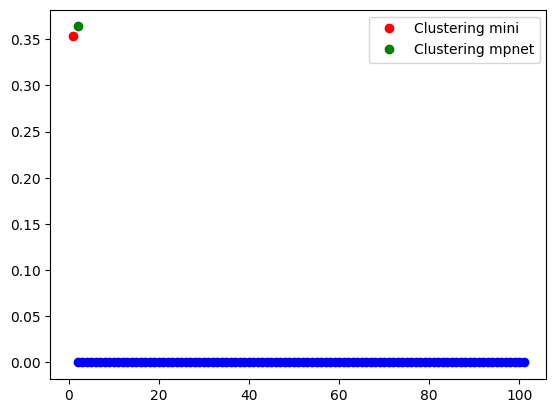

In [14]:
from sklearn.metrics import adjusted_rand_score

Lkvec_ids = np.array(Lkvec_unique_100['id'])
Clusters_ids_mini = np.array(Lkvec_unique_100['id_cluster_mini'])
Clusters_ids_mnet = np.array(Lkvec_unique_100['id_cluster_mnet'])
xs = np.arange(1,103)

plt.plot(xs[0], adjusted_rand_score(Lkvec_ids, Clusters_ids_mini), 'ro', label = 'Clustering mini')
plt.plot(xs[1], adjusted_rand_score(Lkvec_ids, Clusters_ids_mnet), 'go', label = 'Clustering mpnet')

rand_indexs = []
for i in range(100):
    np.random.shuffle(Lkvec_ids)
    ri = adjusted_rand_score(Lkvec_ids, Clusters_ids_mini)
    rand_indexs.append( ri)
    plt.plot(xs[i+1],ri, 'bo')
plt.legend()
plt.show()

In [15]:
# def mapping(df, file, name):
#     n = 'id_cluster_'+str(name)
#     df[n] = np.nan
#     cluster_mapping = {phr[j]: str(i+1) for i, clus in enumerate(file) for j in clus}
#     df[n] = df['phrase'].map(cluster_mapping)
#     return df
mpnet = pk.load(open(pathGit+'clusters_threshold_75_22.pk', 'rb'))
mini = pk.load(open(pathGit+'clusters_threshold_75_02.pk', 'rb'))
clus_05 =  pk.load(open(pathGit+'clusters_threshold_5.pickle', 'rb'))
clus_06 =  pk.load(open(pathGit+'clusters_threshold_6.pickle', 'rb'))
clus_75 =  pk.load(open(pathGit+'clusters_threshold_75.pickle', 'rb'))
clus_08 =  pk.load(open(pathGit+'clusters_threshold_8.pickle', 'rb'))
clus_08_02 =  pk.load(open(pathGit+'clusters_threshold_08_02.pk', 'rb'))
clus_085 =  pk.load(open(pathGit+'clusters_threshold_85_02.pk', 'rb'))
clus_09 =  pk.load(open(pathGit+'clusters_threshold_9_02.pk', 'rb'))


cluster_mapping_mnet = {phr[j]: str(i+1) for i, clus in enumerate(mpnet) for j in clus}
cluster_mapping_mini = {phr[j]: str(i+1) for i, clus in enumerate(mini) for j in clus}
cluster_mapping_05 = {phr[j]: str(i+1) for i, clus in enumerate(clus_05) for j in clus}
cluster_mapping_06 = {phr[j]: str(i+1) for i, clus in enumerate(clus_06) for j in clus}
cluster_mapping_075 = {phr[j]: str(i+1) for i, clus in enumerate(clus_75) for j in clus}
cluster_mapping_08 = {phr[j]: str(i+1) for i, clus in enumerate(clus_08) for j in clus}
cluster_mapping_08_02 = {phr[j]: str(i+1) for i, clus in enumerate(clus_08_02) for j in clus}
cluster_mapping_085 = {phr[j]: str(i+1) for i, clus in enumerate(clus_085) for j in clus}
cluster_mapping_09 = {phr[j]: str(i+1) for i, clus in enumerate(clus_09) for j in clus}


#Lkvec_unique['id_cluster_mnet'] = Lkvec_unique['phrase'].map(cluster_mapping_mnet)
Lkvec_unique['id_cluster_mini'] = Lkvec_unique['phrase'].map(cluster_mapping_mini)
Lkvec_unique['id_cluster_05'] = Lkvec_unique['phrase'].map(cluster_mapping_05)
Lkvec_unique['id_cluster_06'] = Lkvec_unique['phrase'].map(cluster_mapping_06)
Lkvec_unique['id_cluster_075'] = Lkvec_unique['phrase'].map(cluster_mapping_075)
Lkvec_unique['id_cluster_08'] = Lkvec_unique['phrase'].map(cluster_mapping_08)
Lkvec_unique['id_cluster_08_02'] = Lkvec_unique['phrase'].map(cluster_mapping_08_02)
Lkvec_unique['id_cluster_085'] = Lkvec_unique['phrase'].map(cluster_mapping_085)
Lkvec_unique['id_cluster_09'] = Lkvec_unique['phrase'].map(cluster_mapping_09)

0.04030388081757147
0.13475593199485775
0.3594650372344054
0.38351006730639037
0.4297949502600067
0.3881502310944011


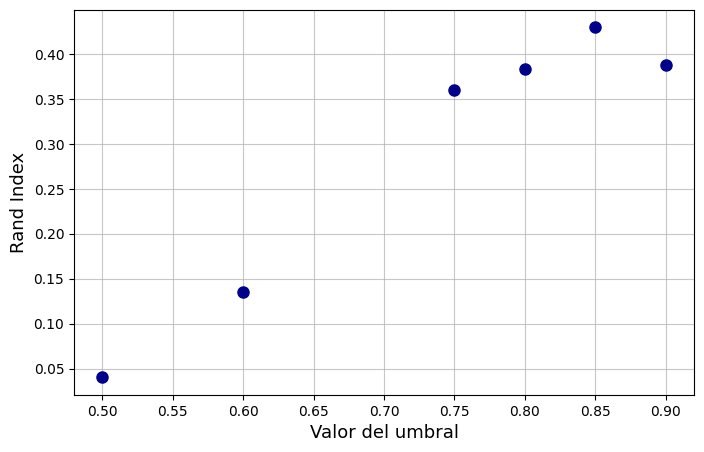

In [18]:
from sklearn.metrics import adjusted_rand_score
#Lkvec_unique.head(10)
#Lkvec_ids = np.array(Lkvec_unique_100['id'])

colu  = ['id_cluster_05','id_cluster_06', 'id_cluster_mnet', 'id_cluster_mini', 'id_cluster_075', 'id_cluster_08', 'id_cluster_08_02', 'id_cluster_085', 'id_cluster_09']
lab  = ['thr = 0.5','thr = 0.6', 'id_cluster_mnet', 'id_cluster_mini', 'thr = 0.75', 'thr = 0.8', 'thr = 0.8_2', 'thr = 0.85', 'thr = 0.9']

colu  = ['id_cluster_05','id_cluster_06',  'id_cluster_075',  'id_cluster_08_02', 'id_cluster_085', 'id_cluster_09']
lab  = ['thr = 0.5','thr = 0.6',  'thr = 0.75', 'thr = 0.8', 'thr = 0.85', 'thr = 0.9']
value = [0.5, 0.6, 0.75, 0.8, 0.85, 0.9]

plt.figure(figsize=(8,5))
for i,col in enumerate(colu):
    df = Lkvec_unique.copy()
    df = df.dropna(subset=[col])
    Lkvec_ids = np.array(df['id'])
    clus = np.array(df[col])
    #plt.plot(i+1, adjusted_rand_score(Lkvec_ids, clus), 'o', label = lab[i], markersize = 8)
    plt.plot(value[i], adjusted_rand_score(Lkvec_ids, clus), 'o', label = lab[i], markersize = 8, color = 'darkblue')
    print(adjusted_rand_score(Lkvec_ids, clus))
#plt.legend()
plt.ylabel('Rand Index', fontsize = 13)
plt.xlabel('Valor del umbral', fontsize = 13)
plt.grid(alpha = 0.7)
plt.savefig('d:/Facultad/Tesis/Escritura/rand_index_nuevo.pdf')
plt.show()


In [26]:
for i,col in enumerate(colu):
    print(col)

id_cluster_mnet
id_cluster_mini
id_clus_05
id_clus_06
id_clus_08


In [29]:
Lkvec_ids = np.array(Lkvec_unique['id'])

adjusted_rand_score(Lkvec_ids, Clusters_ids_mnet)

0.2408770020835203

(array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-1.15585605e-05,  2.40772975e-02,  4.81661536e-02,  7.22550096e-02,
         9.63438657e-02,  1.20432722e-01,  1.44521578e-01,  1.68610434e-01,
         1.92699290e-01,  2.16788146e-01,  2.40877002e-01]),
 <BarContainer object of 10 artists>)

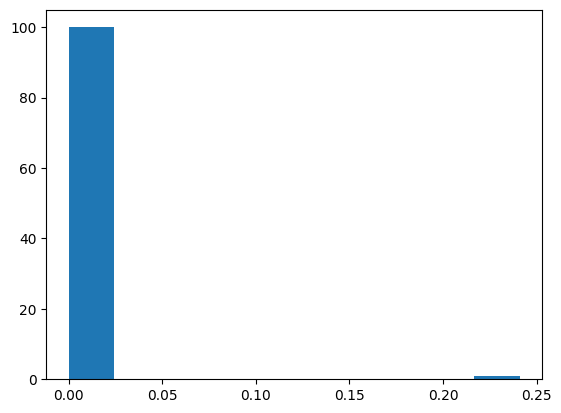

In [94]:
plt.hist(rand_indexs)